# Pymaceuticals Inc.
---

### Analysis

     
   - The pie chart generated confirms that there was a roughly even split of male vs female mice tested.
   - The box plot analysis indicates that mice treated with Capomulin and Ramicane had significantly lower tumor volume compared      to those treated with Infubinol and Ceftamin.
   - The line chart generated shows a relatively strong postivie correlation (r =0.84) between weight of the mouse and the size      of tumors.
   - The regression analysis confirmed that mice weight is a strong indicator of tumor volume (r^ = 0.71)
   - After removing any duplicate mouse ID's there where a total of 248 mice tested with different experimental drug
      treatments. Of those, Capomulin was the treatemnt with the highest sample size as it was tested on 230 of a possible 248         mice.
      
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = df.loc[df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cleaned = df[df['Mouse ID'].isin(dup_mice_ID)==False]
df_cleaned.sample(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
281,l897,Capomulin,Male,17,19,40,38.343902,1
1684,w350,Propriva,Male,7,26,0,45.000000,0
1770,x581,Ceftamin,Female,19,28,30,55.492826,3
462,a203,Infubinol,Female,20,23,40,63.593490,2
177,i177,Ramicane,Male,10,18,10,41.020929,0
826,f345,Infubinol,Male,23,26,5,45.591147,0
1760,x402,Stelasyn,Male,21,28,30,54.351585,3
1604,v289,Ketapril,Female,3,26,20,54.250054,0
1243,n923,Ketapril,Male,19,30,25,56.855465,2
534,a685,Infubinol,Male,8,30,15,48.951474,0


In [6]:
# Checking the number of mice in the clean DataFrame.
df_cleaned["Mouse ID"].nunique()



248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = df_cleaned['Tumor Volume (mm3)'].groupby(df_cleaned['Drug Regimen']).mean()
median = df_cleaned['Tumor Volume (mm3)'].groupby(df_cleaned['Drug Regimen']).median()
var = df_cleaned['Tumor Volume (mm3)'].groupby(df_cleaned['Drug Regimen']).var()
std = df_cleaned['Tumor Volume (mm3)'].groupby(df_cleaned['Drug Regimen']).std()
sem = df_cleaned['Tumor Volume (mm3)'].groupby(df_cleaned['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
            "Median Tumor Volume":median, 
            "Tumor Volume Variance":var, 
            "Tumor Volume Std. Dev.":std, 
            "Tumor Volume Std. Err.":sem})

summary_df.head()


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
sum_aggregated =  df_cleaned.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_aggregated

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

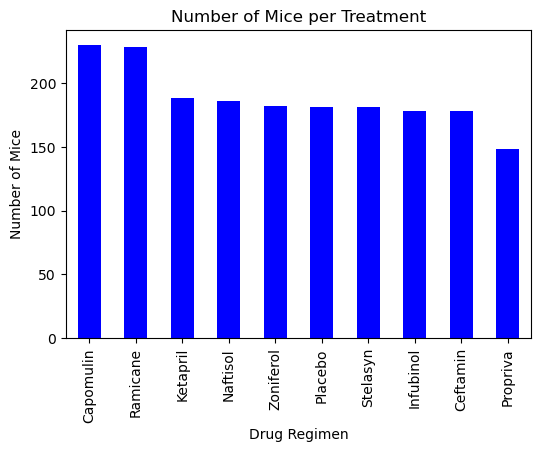

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_treatment = df_cleaned["Drug Regimen"].value_counts()
pandas_bar_chart = mice_per_treatment.plot.bar(color='b', figsize=(6,4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")


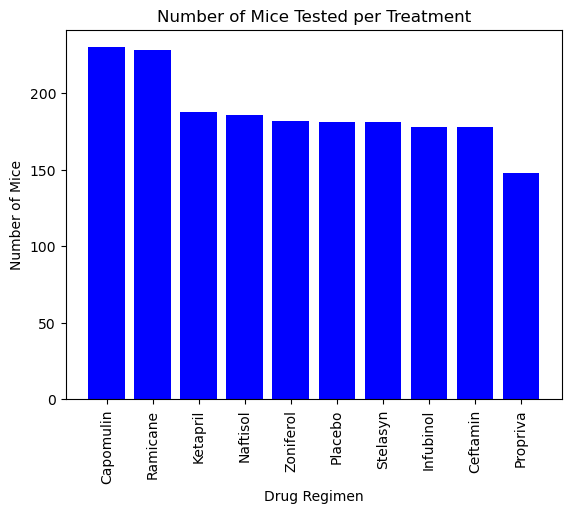

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = mice_per_treatment.values
x_axis = mice_per_treatment.index.values
plt.bar(x_axis, y_axis, color='b')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()


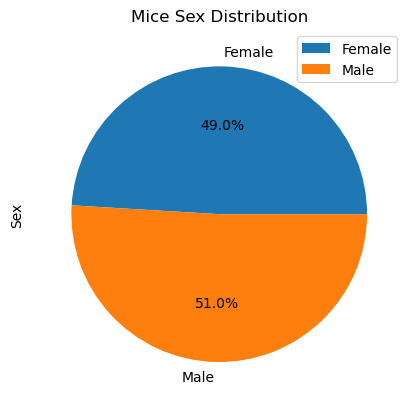

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = df_cleaned.groupby('Sex')
sex_count = pd.DataFrame(sex_group['Sex'].count())

sex_count.plot(kind='pie', y='Sex', title="Mice Sex Distribution", autopct='%1.1f%%')
plt.show()

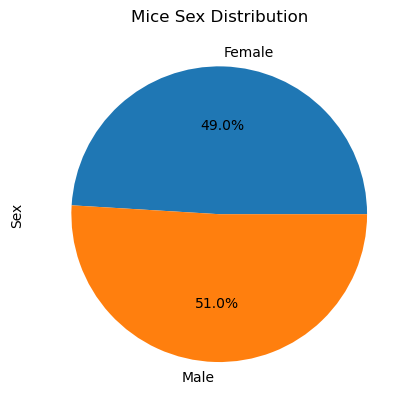

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =  ['Female', 'Male']
values = sex_count['Sex']

plt.title("Mice Sex Distribution")
plt.ylabel("Sex")
plt.pie(values, labels=labels ,autopct='%1.1f%%')
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Ramicane = df_cleaned.loc[df_cleaned['Drug Regimen'] == "Ramicane"]
Infubinol = df_cleaned.loc[df_cleaned['Drug Regimen'] == "Infubinol"]
Ceftamin = df_cleaned.loc[df_cleaned['Drug Regimen'] == "Ceftamin"]
Capomulin = df_cleaned.loc[df_cleaned['Drug Regimen'] == "Capomulin"]

# Start by getting the last (greatest) timepoint for each mouse
Ramicane_last_time = Ramicane.groupby('Mouse ID').max()['Timepoint']
Ramicane_final_vol = pd.DataFrame(Ramicane_last_time)

Infubinol_last_time = Infubinol.groupby('Mouse ID').max()['Timepoint']
Infubinol_final_vol = pd.DataFrame(Infubinol_last_time)

Ceftamin_last_time = Ceftamin.groupby('Mouse ID').max()['Timepoint']
Ceftamin_final_vol = pd.DataFrame(Ceftamin_last_time)

Capomulin_last_time = Capomulin.groupby('Mouse ID').max()['Timepoint']
Capomulin_final_vol = pd.DataFrame(Capomulin_last_time)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_df = pd.merge(Ramicane_final_vol, df_cleaned, on=("Mouse ID","Timepoint"),how="left")

Infubinol_df = pd.merge(Infubinol_final_vol, df_cleaned, on=("Mouse ID","Timepoint"),how="left")

Ceftamin_df = pd.merge(Ceftamin_final_vol, df_cleaned, on=("Mouse ID","Timepoint"),how="left")

Capomulin_df = pd.merge(Capomulin_final_vol, df_cleaned, on=("Mouse ID","Timepoint"),how="left")

Ramicane_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [14]:
Infubinol_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [15]:
Ceftamin_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [16]:
Capomulin_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Ramicane_tumor_vol = Ramicane_df["Tumor Volume (mm3)"]

quartiles = Ramicane_tumor_vol.quantile([0.25,0.5,0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3-Q1

upper_bound = Q3 + (IQR*1.5)
lower_bound = Q1 - (IQR*1.5)

print(upper_bound)
print(lower_bound)

54.30681135
17.912664470000003


In [18]:
Ramicane_outliers = Ramicane_df.loc[(Ramicane_df["Tumor Volume (mm3)"] < lower_bound) | 
                                     (Ramicane_df["Tumor Volume (mm3)"] > upper_bound), :]

print(Ramicane_outliers)

Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
Infubinol_tumor_vol = Infubinol_df["Tumor Volume (mm3)"]

quartiles = Infubinol_tumor_vol.quantile([0.25,0.5,0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3-Q1

upper_bound = Q3 + (IQR*1.5)
lower_bound = Q1 - (IQR*1.5)

print(upper_bound)
print(lower_bound)

82.74144559000001
36.83290494999999


In [20]:
Infubinol_outliers = Infubinol_df.loc[(Infubinol_df["Tumor Volume (mm3)"] < lower_bound) | 
                                     (Infubinol_df["Tumor Volume (mm3)"] > upper_bound), :]
Infubinol_outliers

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
5,c326,5,Infubinol,Female,18,25,36.321346,0


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Ceftamin_tumor_vol = Ceftamin_df["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumor_vol.quantile([0.25,0.5,0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3-Q1

upper_bound = Q3 + (IQR*1.5)
lower_bound = Q1 - (IQR*1.5)

print(upper_bound)
print(lower_bound)

87.66645829999999
25.355449580000002


In [22]:
Ceftamin_outliers = Ceftamin_df.loc[(Ceftamin_df["Tumor Volume (mm3)"] < lower_bound) | 
                                     (Ceftamin_df["Tumor Volume (mm3)"] > upper_bound), :]
print(Ceftamin_outliers)

Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []


In [23]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_tumor_vol = Capomulin_df["Tumor Volume (mm3)"]

quartiles = Capomulin_tumor_vol.quantile([0.25,0.5,0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3-Q1

upper_bound = Q3 + (IQR*1.5)
lower_bound = Q1 - (IQR*1.5)

print(upper_bound)
print(lower_bound)

51.83201549
20.70456164999999


In [24]:
Capomulin_outliers = Capomulin_df.loc[(Capomulin_df["Tumor Volume (mm3)"] < lower_bound) | 
                                     (Capomulin_df["Tumor Volume (mm3)"] > upper_bound), :]
print(Capomulin_outliers)

Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []


(10.0, 80.0)

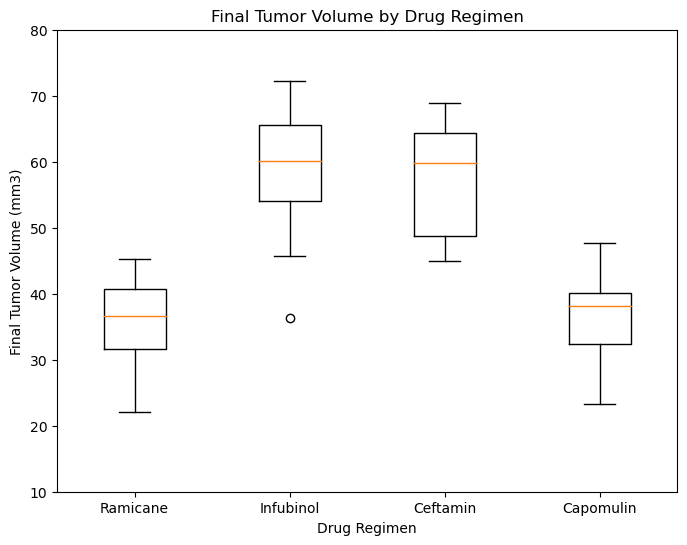

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [Ramicane_tumor_vol, Infubinol_tumor_vol, Ceftamin_tumor_vol, Capomulin_tumor_vol]
Regimen= ['Ramicane', 'Infubinol','Ceftamin','Capomulin']

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data, labels=Regimen, widths = 0.4,vert=True)
plt.ylim(10, 80)


## Line and Scatter Plots

(20.0, 50.0)

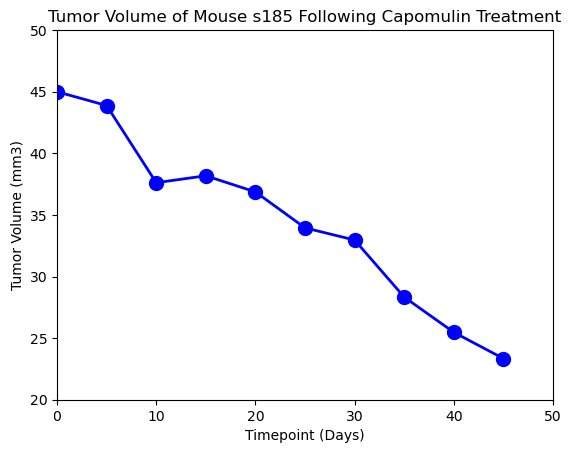

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = df_cleaned.loc[df_cleaned["Mouse ID"] == "s185",:]
x_axis = line_df["Timepoint"]
tumor_volume = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Tumor Volume of Mouse s185 Following Capomulin Treatment')
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=10,marker="o",color="b")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0,50)
plt.ylim(20,50)

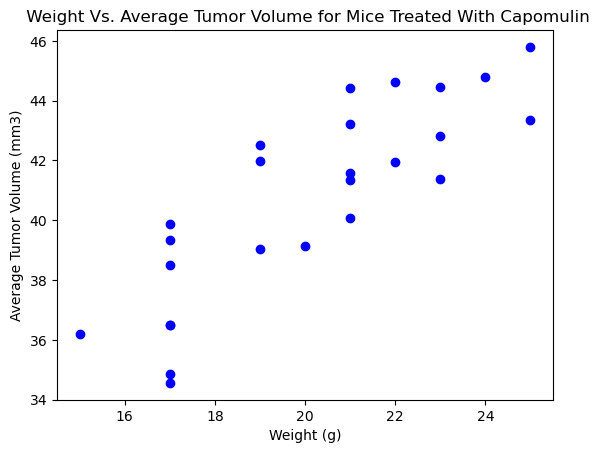

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
Capomulin_avg_vol = Capomulin.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(Capomulin_avg_vol['Weight (g)'],Capomulin_avg_vol['Tumor Volume (mm3)'], color="b")
plt.title(' Weight Vs. Average Tumor Volume for Mice Treated With Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Capomulin_avg_vol['Weight (g)'], Capomulin_avg_vol['Tumor Volume (mm3)'])
print(correlation)


PearsonRResult(statistic=0.8419363424694719, pvalue=1.3225722434712586e-07)


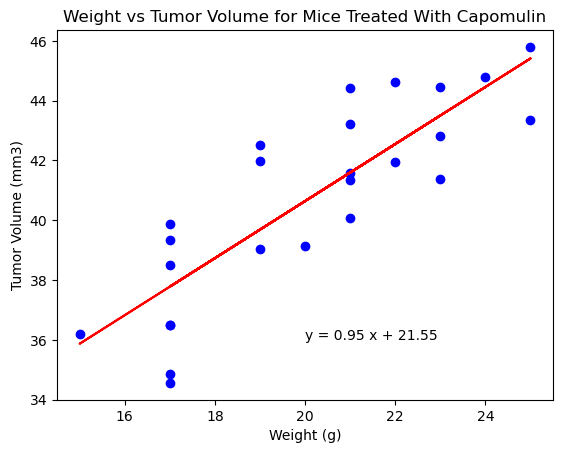

 r^2 = 0.71


In [29]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(Capomulin_avg_vol["Weight (g)"],Capomulin_avg_vol["Tumor Volume (mm3)"])
regress_values= slope* Capomulin_avg_vol["Weight (g)"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(Capomulin_avg_vol["Weight (g)"],Capomulin_avg_vol["Tumor Volume (mm3)"],color='b')
plt.plot(Capomulin_avg_vol["Weight (g)"], regress_values, color='r')
plt.annotate(line_eq,(20,36))
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Mice Treated With Capomulin")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")